# Konvolucione neuronske mreze

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models

2022-06-25 12:02:46.729977: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-25 12:02:46.729995: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Upoznavanje sa podacima

In [3]:
(train_images , train_labels) , (test_images , test_labels) = datasets.cifar10.load_data()

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

n_classes = 10

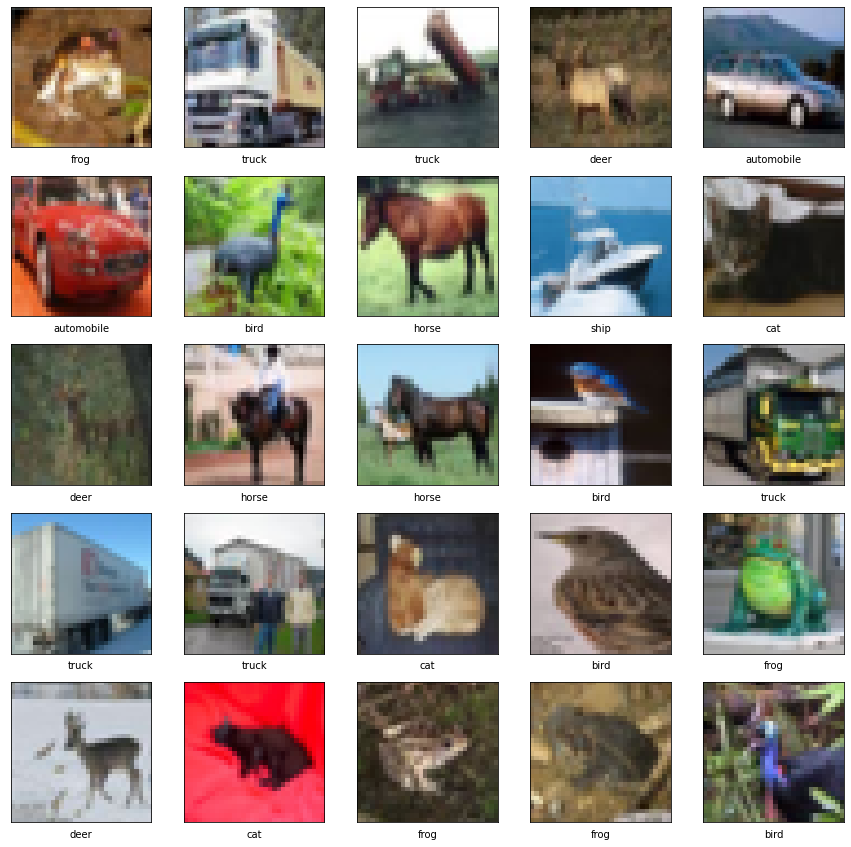

In [5]:
plt.figure(figsize=(15,15))
for i , img in enumerate(train_images[:25]):
    plt.subplot(5 , 5, i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f"{class_names[train_labels[i][0]]}")
plt.show()

## Preprocesiranje modela

In [6]:
train_images = train_images / 255
test_images = test_images / 255

In [7]:
train_labels_cat = tf.keras.utils.to_categorical(train_labels, n_classes)
test_labels_cat = tf.keras.utils.to_categorical(test_labels, n_classes)

## Treniranje modela

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation="relu" , input_shape=(32,32,3) ))
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D(64 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D( (2,2) ))
model.add(layers.Conv2D(64 , (3,3) , activation="relu"))

2022-06-25 12:02:52.042360: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-25 12:02:52.042388: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-25 12:02:52.042405: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ursula): /proc/driver/nvidia/version does not exist
2022-06-25 12:02:52.042681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [12]:
model_name = "cnn1"
model_path = f"models/{model_name}.h5"
history_path = f"models/{model_name}.hist"

In [13]:
n_epochs = 10
batch_size = 64

import pickle
import os.path

model_exist = os.path.exists(model_path)

if not model_exist:

    model.compile(optimizer="adam",
                  loss=tf.losses.CategoricalCrossentropy(),
                  metrics=["accuracy"])

    history = model.fit(train_images , train_labels_cat,
                        epochs=n_epochs , batch_size=batch_size,
                        validation_data=(test_images,test_labels_cat)).history
    
    model.save(model_path)
    with open(history_path , "wb") as hist_file:
        pickle.dump(history , hist_file)
        
else:
    model = models.load_model(model_path)
    with open(history_path , "rb") as hist_file:
        history = pickle.load(hist_file)

## Evaluacija modela

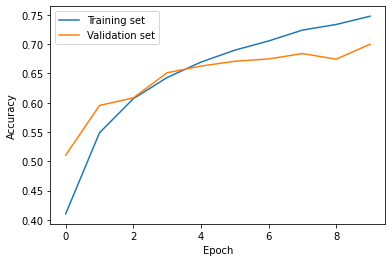

In [14]:
plt.plot(range(n_epochs) , history["accuracy"])
plt.plot(range(n_epochs) , history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training set", "Validation set"])
plt.show()

In [15]:
test_loss , test_acc = model.evaluate(test_images , test_labels_cat)

313/313 [==============================] - 2s 4ms/step - loss: 0.8879 - accuracy: 0.6998


In [16]:
test_acc

0.6998000144958496